## Importing the Libraries

This imports pandas, numpy, matplotlib.pyplot, and seaborn so that they can be used to manipulate and analyze the data from the csv file.

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV Dataset File

`customer_data` is created here by using pandas to read the csv file and pull all the data into a single place.

In [417]:
customer_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/Assignment3_MEH/customer_data.csv")

## Exploring the Dataset

`customer_data.head()` allows the user to see the first 5 rows of the dataset. `customer_data.info()` allows the user to see the total number of entries, the datatypes of each column, how many entries are null / not null, and each column in the dataset.

In [418]:
customer_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [419]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


## Imputing Missing Values

`customer_data.isnull().sum()` shows the sum of the number of null entries in each column of the dataset. `sns.distplot` was called for the fea_2 column that had null entries to see its histogram. This helps determine which method (mean, median, or mode) to use to impute its missing data. Since this column is normally distributed (even with a few outliers), the mean is used for imputation. The `SimpleImputer` from sklearn was used to impute the data and `.info()` and `.isnull().sum()` was used again to show that there were no more null values in the dataset. The for loop loops through the dataset and counts each column's information, showing that the dataset is not balanced in the columns.

In [420]:
customer_data.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


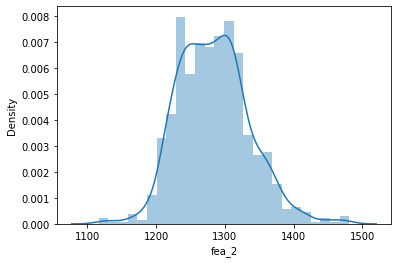

In [421]:
sns.distplot(customer_data['fea_2'])

In [422]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")

In [423]:
customer_data.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [424]:
customer_data['fea_2'] = imputer.fit_transform(customer_data[['fea_2']])

In [425]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   1125 non-null   float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [426]:
customer_data.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [427]:
for col in customer_data.columns : 
  print(customer_data[col].value_counts())

0    900
1    225
Name: label, dtype: int64
54982665    1
58991343    1
54988970    1
54991614    1
58989779    1
           ..
54982697    1
54987300    1
58993803    1
58985008    1
54989781    1
Name: id, Length: 1125, dtype: int64
7    476
4    377
5    261
1      7
6      2
2      2
Name: fea_1, dtype: int64
1283.911373    149
1241.000000     37
1214.000000     27
1305.500000     23
1287.500000     21
              ... 
1221.500000      1
1197.500000      1
1368.500000      1
1116.500000      1
1137.500000      1
Name: fea_2, Length: 159, dtype: int64
3    684
1    309
2    132
Name: fea_3, dtype: int64
35000.0     34
50000.0     25
90000.0     19
150000.0    19
110000.0    18
            ..
168000.0     1
379000.0     1
274000.0     1
238000.0     1
336000.0     1
Name: fea_4, Length: 229, dtype: int64
2    1045
1      80
Name: fea_5, dtype: int64
11    465
8     375
15    259
12     11
4       4
5       3
6       2
9       2
3       2
16      2
Name: fea_6, dtype: int64
 5     6

## Splitting the Dataset into Train and Test Sets using Holdout Validation

The `x` and `y` variables are created using the drop method. `train_test_split` is called from sklearn to split the data 80/20 into 4 different parts, `x_train`, `x_test`, `y_train`, and `y_test`.

In [428]:
x = customer_data.drop(['label'], axis = 1)
y = customer_data['label']

In [429]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Scaling the Dataset using Standard Scaler

`StandardScaler()` is called from `sklearn.preprocessing` to take both x training and test sets and scale them to fit the rest of the data and make the model more accurate.

In [430]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## SVC Classifier

The SVC classifier is imported from the sklearn SVM library so that it can be used as a classifier for 3 of the 4 techniques. The current score shows that the model is accurate, but not as accurate as we would like. When paired with one of the techniques, it can make the accuracy score go up.

In [431]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 0)
svc_model.fit(x_train, y_train)

SVC(random_state=0)

In [432]:
svc_model_score = svc_model.score(x_test, y_test)

## Logistic Regression

The Logistic Regression is imported from the sklearn linear model library so that it can be used for 1 of the 4 techniques. The current score shows that the model is accurate, but not as accurate as we would like. When paired with one of the techniques, it can make the accuracy score go up.

In [433]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(random_state = 0)
logistic_regressor.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [434]:
logistic_score = logistic_regressor.score(x_test, y_test)
print(logistic_score)

0.7644444444444445


## Stratified K Fold Cross Validation with SVC Classifier

The Stratified K Fold CV technique is used here for an imbalanced dataset. The parameters give multiple scores, from each iteration, and the final score takes these score values and takes the mean as the final score of 80% accuracy for the Stratified K Fold CV for this dataset.

In [435]:
from sklearn.model_selection import KFold, cross_val_score
svc_kfold = SVC(kernel = "rbf", max_iter = 1000, random_state = 42)
KFoldVal = KFold(10)

In [436]:
result_KFold = cross_val_score(svc_kfold, x, y, cv = KFoldVal)
print(result_KFold)

[0.7699115  0.78761062 0.7699115  0.78761062 0.77876106 0.76785714
 0.80357143 0.83928571 0.83928571 0.85714286]


In [437]:
kfold_score = np.mean(result_KFold)
print(kfold_score)

0.800094816687737


## Repeated Random Subsampling CV with SVC Classifier

The Repeated Random Subsampling CV technique is used here and the parameters give multiple scores, from each iteration, and the final score takes these score values and takes the mean as the final score of 78% to 81% accuracy for this technique, sometimes slightly better than the other techniques and sometimes slightly worse (all due to the shuffle in each execution).

In [438]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
svc_rrscv = SVC(kernel = 'rbf', max_iter = 1000, random_state = 0)
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.2)
result_ssplit = cross_val_score(svc_rrscv, x, y, cv = ssplit)
result_ssplit

array([0.82666667, 0.83111111, 0.79555556, 0.80444444, 0.79555556,
       0.81777778, 0.77333333, 0.80888889, 0.82222222, 0.83111111])

In [439]:
ssplit_score = np.mean(result_ssplit)
print(ssplit_score)

0.8106666666666665


## Randomized Search with Logistic Regressor

The Randomized Search technique is used here with the Logistic Regressor and the parameters give multiple scores, from each iteration, and the final score takes these score values and takes the mean as the final score of around 80% accuracy for this technique, around the same as Stratified K Fold Technique and the Grid Search technique.

In [440]:
from sklearn.model_selection import RandomizedSearchCV
logistic_params = {
         'solver': ['liblinear', 'lbfgs']
}

In [441]:
random_model = RandomizedSearchCV(estimator = logistic_regressor, param_distributions = logistic_params, n_iter = 3)
random_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=LogisticRegression(random_state=0), n_iter=3,
                   param_distributions={'solver': ['liblinear', 'lbfgs']})

In [442]:
random_score = random_model.score(x_train, y_train)
print(random_score)

0.8088888888888889


## Grid Search with SVC Classifier

The Grid Search technique is used here and the parameters give multiple scores, from each iteration, and the final score takes these score values and takes the mean as the final score of 80% accuracy for this technique.

In [443]:
from numpy.lib.polynomial import poly
from sklearn.model_selection import GridSearchCV
gridsearch_params = {'kernel': ['rbf', 'linear', 'poly'],
                     'C': [0.1, 1],
                     'gamma': [0.1, 1]
}

In [444]:
grid_model = GridSearchCV(estimator = SVC(), param_grid = gridsearch_params, cv = 5)

In [445]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly']})

In [446]:
grid_score = grid_model.score(x_train, y_train)
print(grid_score)

0.8088888888888889


## Pretty Table to Compare Scores

The Pretty Table is imported from the Pretty Table library to compare the scores from the 4 techniques and the SVC and Logistic Regression scores. It is clear that the SVC and Logistic Regression scores were lower than the rest. Stratified K Fold CV with SVC, Randomized Search with Logistic Regression, and Grid Search with SVC all have around the same score of 80%. The best score was the Repeated Random Subsampling CV with SVC with 81%, but it is a random shuffle so it is not consistent and ranges from 78% as the lowest to 81% as the highest.

In [447]:
from prettytable import PrettyTable
myTable = PrettyTable(["Technique and Classifier", "Score"])
myTable.add_row(['SVC', svc_model_score])
myTable.add_row(['Logistic Regression', logistic_score])
myTable.add_row(['Stratified K Fold CV with SVC', kfold_score])
myTable.add_row(['Repeated Random Subsampling CV with SVC', ssplit_score])
myTable.add_row(['Randomized Search with Logistic Regression', random_score])
myTable.add_row(['Grid Search with SVC', grid_score])

In [448]:
print(myTable)

+--------------------------------------------+--------------------+
|          Technique and Classifier          |       Score        |
+--------------------------------------------+--------------------+
|                    SVC                     | 0.7644444444444445 |
|            Logistic Regression             | 0.7644444444444445 |
|       Stratified K Fold CV with SVC        | 0.800094816687737  |
|  Repeated Random Subsampling CV with SVC   | 0.8106666666666665 |
| Randomized Search with Logistic Regression | 0.8088888888888889 |
|            Grid Search with SVC            | 0.8088888888888889 |
+--------------------------------------------+--------------------+
